In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob as g
import pandas as pd

In [3]:
file = sorted(g.glob('output_*'))
print(file)

['output_clr', 'output_rrtm_ICRCCM_sonde', 'output_rrtm_MLS-cld5-imca0-icld2', 'output_rrtm_MLS-cld5-imca1-icld2', 'output_rrtm_MLS-cld7-imca1-icld2', 'output_rrtm_MLS-cld7-imca1-icld4-idcor0', 'output_rrtm_MLS-cld7-imca1-icld5-idcor0', 'output_rrtm_MLS-cld7-imca1-icld5-idcor1', 'output_rrtm_MLS-clr', 'output_rrtm_MLS-clr-aer12', 'output_rrtm_MLS-clr-idrv1', 'output_rrtm_MLS-clr-xsec', 'output_rrtm_MLW-clr', 'output_rrtm_SAW-clr', 'output_rrtm_TROP-clr']


The following function reads values from an rrtmg-lw output file and stores them in variables. This can be used to study heating profiles of the atmosphere under set conditions.

In [24]:
def rrtmg_lw_output_read(nlev, file):
    lvl = np.full(nlev,np.nan);
    prs = np.full(nlev,np.nan);
    #fup = np.full(nlev,np.nan);
    #fdn = np.full(nlev,np.nan);
    fnt = np.full(nlev,np.nan);
    htr = np.full(nlev,np.nan);
    
    fi  = open(file,'r')
    lines = fi.readlines()[3:]

    for j in range(1,nlev):

#    return fup,fdn,fnt,htr
        tmp1 = lines[j];
        tmp2 = tmp1.split();
        lvl[j] = tmp2[0];
        prs[j] = tmp2[1];
        #fup[j] = tmp2[2];
        #fdn[j] = tmp2[3];
        fnt[j] = tmp2[4];
        htr[j] = tmp2[5]; 
        
    lvl = lvl[::-1]
    prs = prs[::-1]
    #fup = fup[::-1]
    #fdn = fdn[::-1]
    fnt = fnt[::-1]
    htr = htr[::-1]
    
    fi.close()
    return lvl,prs,fnt,htr #fup,fdn,fnt,htr

Storing output of rrtmg_lw_read_output from a specific output file in an array.

In [25]:
output_run = rrtmg_lw_output_read(61,file[0]) #This stores the output data for output_clr for 50 levels

In [26]:
#print(output_run)

Variation of Heating rate vs Altitude/Atmospheric Layers under standard atmosphere clear sky conditions.

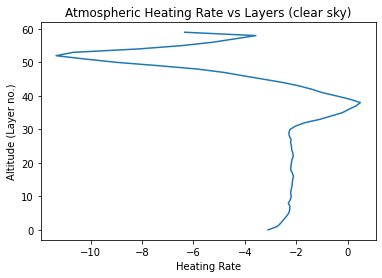

In [27]:
plt.plot(output_run[3], output_run[0])
plt.xlabel('Heating Rate')
plt.ylabel('Altitude (Layer no.)')
plt.title('Atmospheric Heating Rate vs Layers (clear sky)')
plt.show()

Variation of Net Radiative Flux vs Altitude

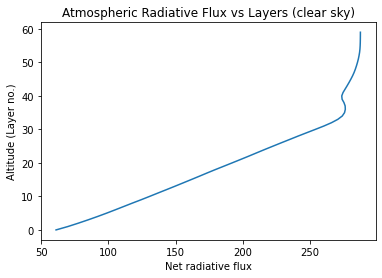

In [28]:
plt.plot(output_run[2], output_run[0])
plt.xlabel('Net radiative flux')
plt.ylabel('Altitude (Layer no.)')
plt.title('Atmospheric Radiative Flux vs Layers (clear sky)')
plt.show()

The following plot seeks to the relation

$\left(\frac{dT}{dt}\right)_{\nu} = -\frac{1}{\rho c_p}\frac{dF_{\nu}}{dz}$

We first difference the net radiative flux data and plot its ratio with pressure against the heating rate. A straight line should be observed.
(Note: I couldn't retrieve the dz vs d(Layer) data, so the following plot just has $dF/\rho$ vs $dT/dt$ 

[1.013e+03 9.892e+02 9.655e+02 9.417e+02 9.179e+02 8.941e+02 8.704e+02
 8.466e+02 8.228e+02 7.990e+02 7.753e+02 7.515e+02 7.277e+02 7.039e+02
 6.801e+02 6.564e+02 6.326e+02 6.088e+02 5.850e+02 5.613e+02 5.375e+02
 5.137e+02 4.899e+02 4.662e+02 4.424e+02 4.186e+02 3.949e+02 3.711e+02
 3.473e+02 3.235e+02 2.998e+02 2.760e+02 2.522e+02 2.284e+02 2.028e+02
 1.806e+02 1.568e+02 1.331e+02 1.095e+02 8.578e+01 6.200e+01 4.420e+01
 3.151e+01 2.246e+01 1.601e+01 1.142e+01 8.139e+00 5.803e+00 4.137e+00
 2.949e+00 2.102e+00 1.499e+00 1.069e+00 7.617e-01 5.430e-01 3.871e-01
 2.760e-01 1.968e-01 1.403e-01 1.000e-01       nan]


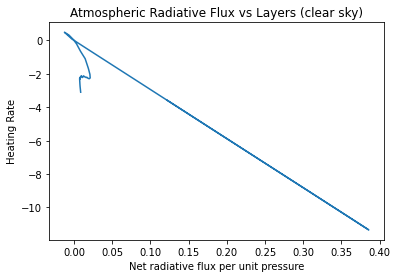

In [29]:
dfdz = []
for i in range(0,len(output_run[2])-1):
    temp = output_run[2][i+1]-output_run[2][i]
    dfdz.append(temp)
dfdz.append(0)
print(output_run[1])
plt.plot(dfdz/output_run[1], output_run[3])
plt.xlabel('Net radiative flux per unit pressure')
plt.ylabel('Heating Rate')
plt.title('Atmospheric Radiative Flux vs Layers (clear sky)')
plt.show()

The Heating Rate vs Altitude (Atmospheric Layers) shows several inversions with height. (Are these inversions related to temperature inversions?)
The net Radiative Flux is linear in nature upto ~35th layer, whence it seemingly stabilizes.
Finally, the net Flux per unit pressure vs Heating Rate follows a linear plot.

In [74]:
#This is for custom reading - for outputs that are partitioned into data based on wavenumber bands.
# A search with a certain wavenumber string would yield a relevant output

def rrtmg_lw_output_read_51l(nlev, file, string):
    lvl = np.full(nlev,np.nan);
    prs = np.full(nlev,np.nan);
    #fup = np.full(nlev,np.nan);
    #fdn = np.full(nlev,np.nan);
    fnt = np.full(nlev,np.nan);
    htr = np.full(nlev,np.nan);
    
    fi  = open(file,'r')
    lines = fi.readlines()[0:]
    print(lines[0])
    for row in lines:
        # check if string present on a current line
        word = string
        # if found it returns index of the first occurrence of the substring
        if row.find(word) != -1:
            print('string exists in file')
            index = lines.index(row)
            print(index)
            lines = lines[index+3:]
            break
    
    #print(lines)
    

    for j in range(0,nlev):

        tmp1 = lines[j];
        tmp2 = tmp1.split();
        lvl[j] = tmp2[0];
        prs[j] = tmp2[1];
        #fup[j] = tmp2[2];
        #fdn[j] = tmp2[3];
        fnt[j] = tmp2[4];
        htr[j] = tmp2[5]; 
        
    lvl = lvl[::-1]
    prs = prs[::-1]
    #fup = fup[::-1]
    #fdn = fdn[::-1]
    fnt = fnt[::-1]
    htr = htr[::-1]
    
    fi.close()
    return lvl,prs,fnt,htr #fup,fdn,fnt,htr


Wavenumber ranges:<br>

Total:  
10.0 - 3250.0

Partitions (can be used as search strings):<br>
```
10.0 -  350.0 
350.0 -  500.0 
500.0 -  630.0 
630.0 -  700.0 
700.0 -  820.0 
820.0 -  980.0 
980.0 - 1080.0 
1080.0 - 1180.0 
1180.0 - 1390.0 
1390.0 - 1480.0 
1480.0 - 1800.0 
1800.0 - 2080.0 
2080.0 - 2250.0 
2250.0 - 2380.0 
2380.0 - 2600.0 
2600.0 - 3250.0
```

In [76]:
output_51l = rrtmg_lw_output_read_51l(51,file[8],'10.0 - 3250.0') #Midlattitude summer sky, clear conditions, 51 layers

 Wavenumbers:   10.0 - 3250.0 cm-1, ATM      1

string exists in file
0


In [77]:
print(output_51l[0])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.]


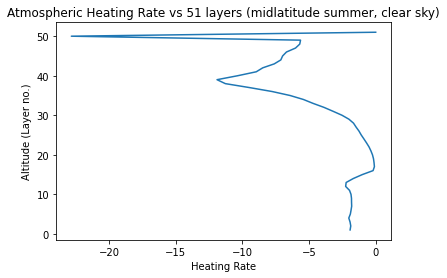

In [78]:
plt.plot(output_51l[3], output_51l[0])
plt.xlabel('Heating Rate')
plt.ylabel('Altitude (Layer no.)')
plt.title('Atmospheric Heating Rate vs 51 layers (midlatitude summer, clear sky)')
plt.show()

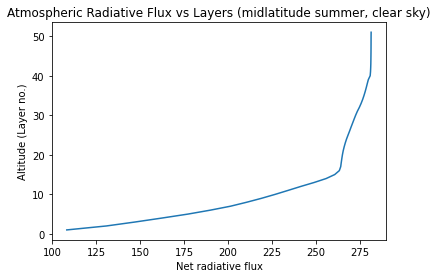

In [79]:
plt.plot(output_51l[2], output_51l[0])
plt.xlabel('Net radiative flux')
plt.ylabel('Altitude (Layer no.)')
plt.title('Atmospheric Radiative Flux vs Layers (midlatitude summer, clear sky)')
plt.show()